In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
df = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\mushrooms.csv')

In [39]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

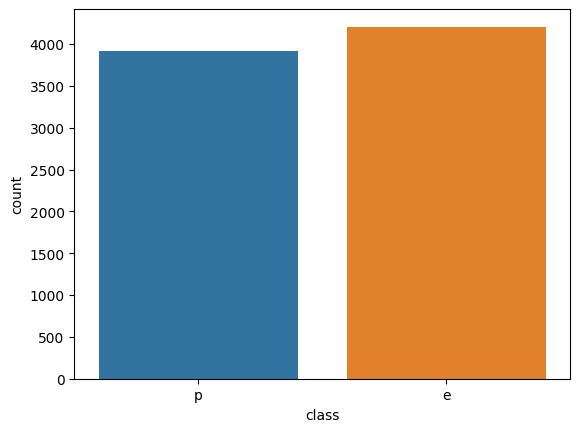

In [40]:
sns.countplot(data=df, x='class', hue='class')

In [41]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [42]:
feat_unit = df.describe().transpose().reset_index().sort_values('unique')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

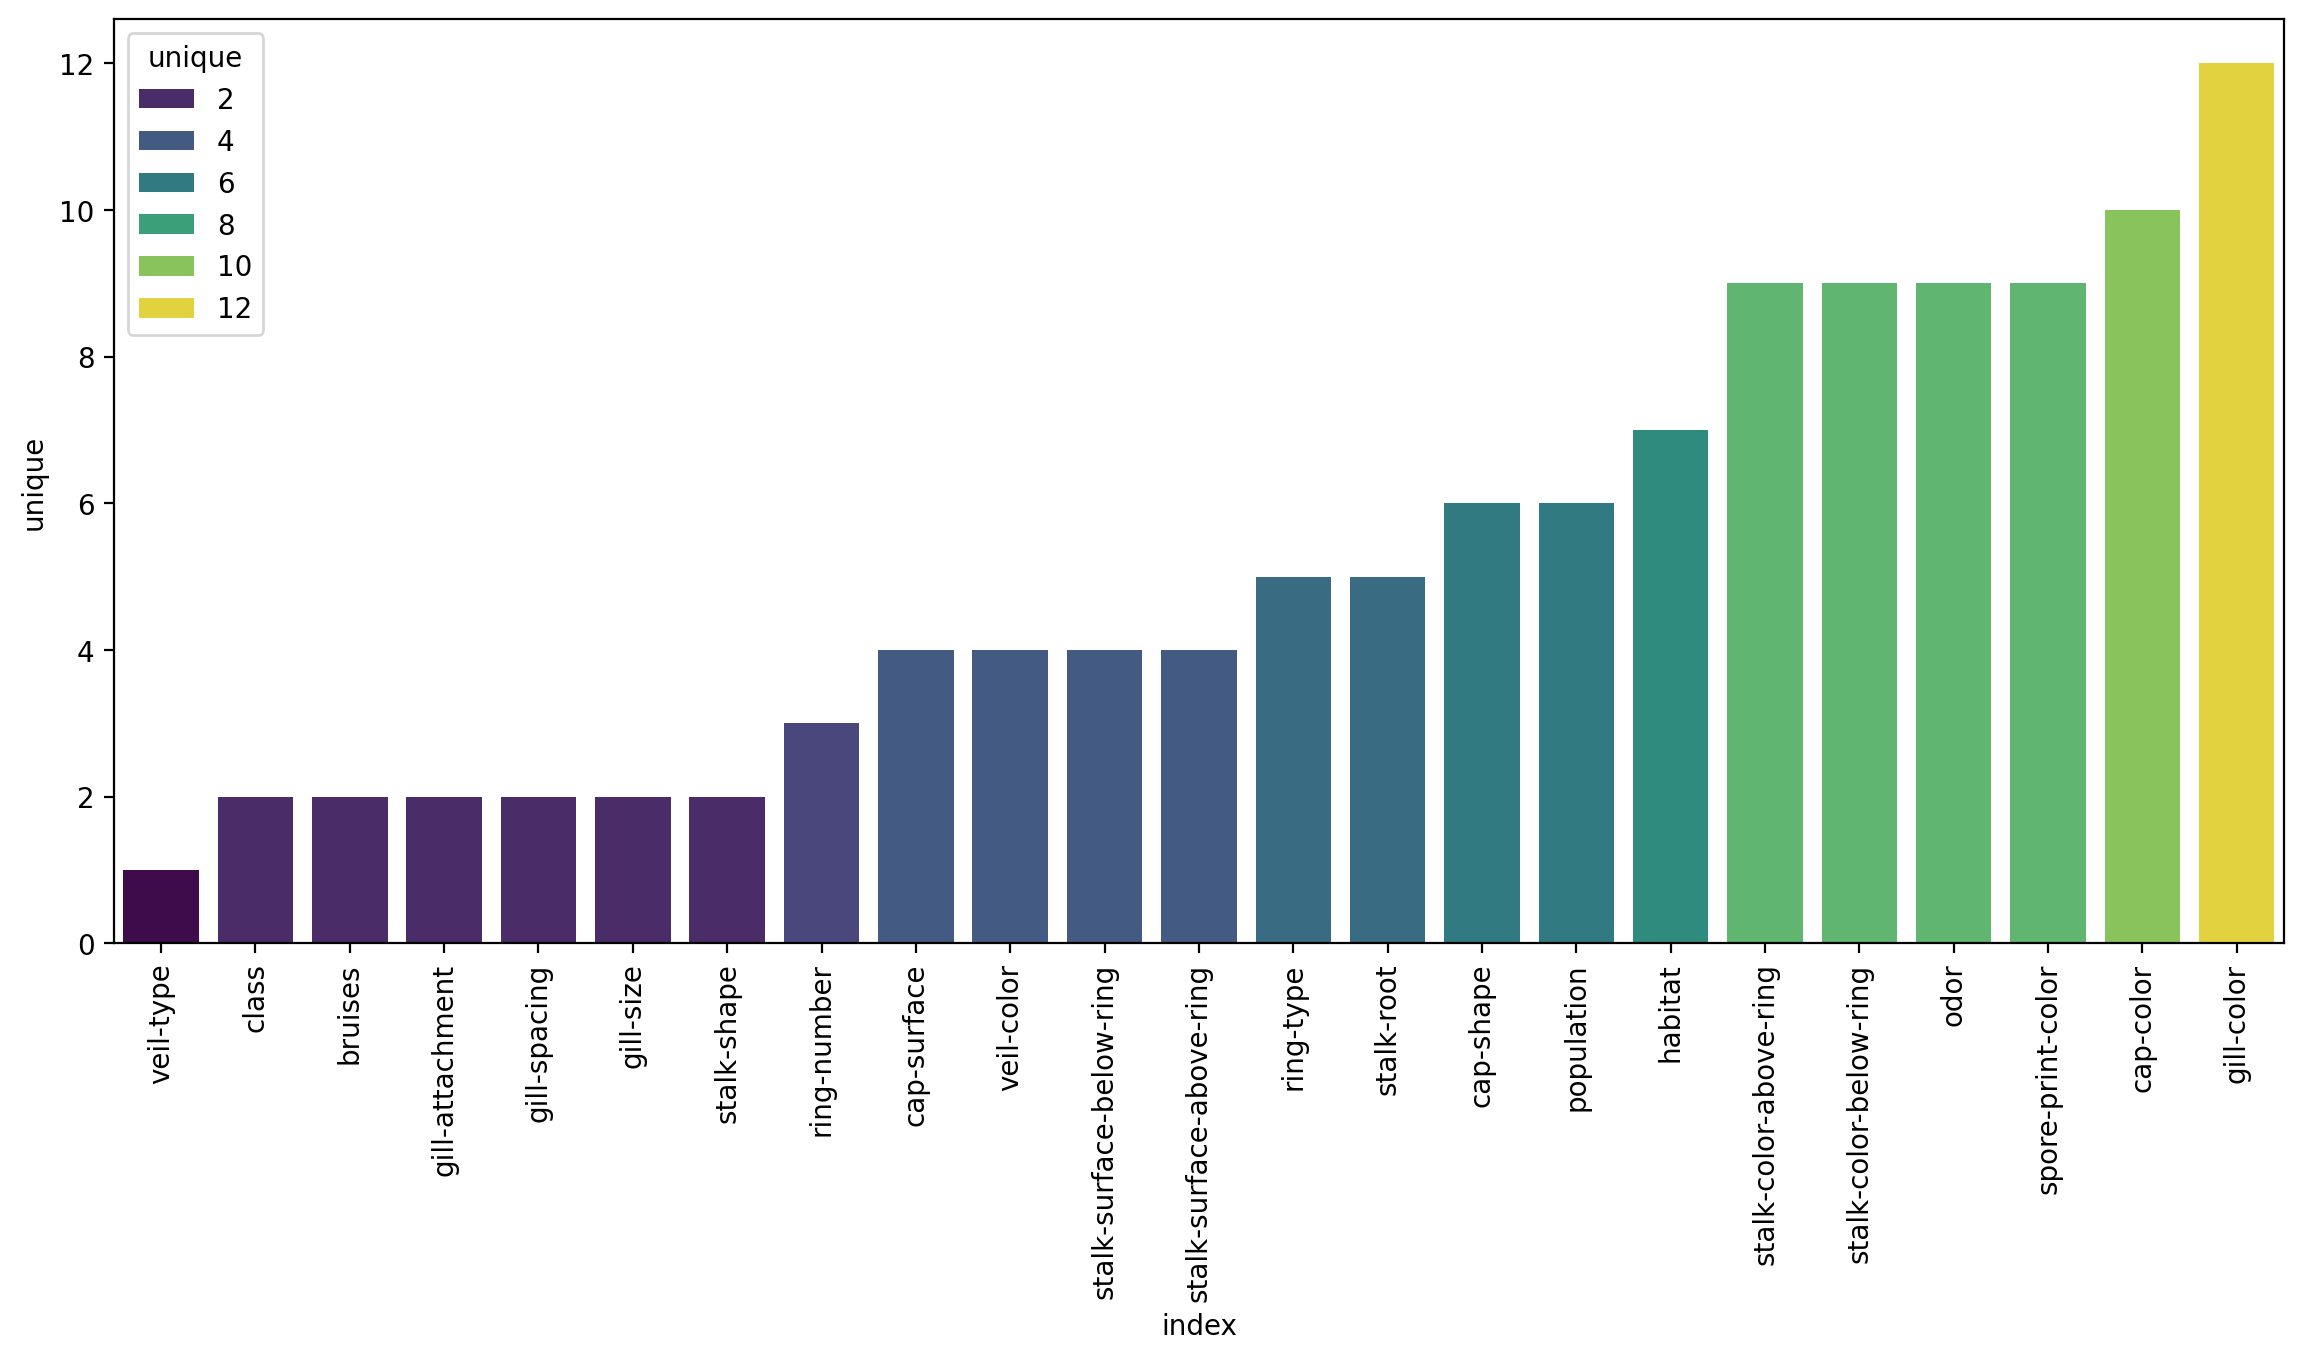

In [43]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=feat_unit, x='index', y='unique', hue='unique', palette='viridis')
plt.xticks(rotation=90)

In [44]:
X = df.drop(columns='class', axis=1)

In [45]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
y = df['class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)

,estimator,None
,n_estimators,1
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [55]:
preds = model.predict(X_test)

In [56]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87       843
           p       0.81      0.97      0.88       782

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625



In [57]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
model.feature_importances_.argmax()

22

In [59]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

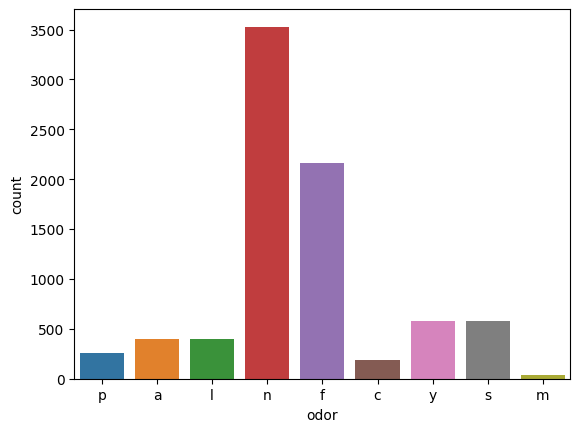

In [61]:
sns.countplot(data=df, x='odor', hue='odor')

<Axes: xlabel='odor', ylabel='count'>

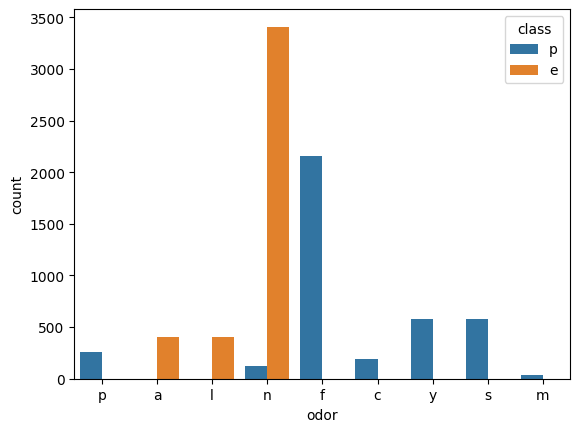

In [62]:
sns.countplot(data=df, x='odor', hue='class')

In [64]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

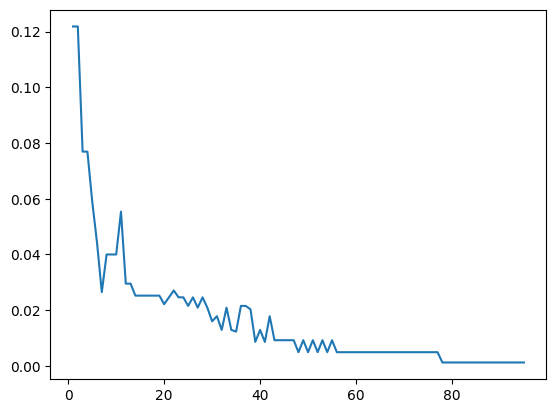

In [65]:
plt.plot(range(1, 96), error_rates)

In [71]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
importances = feats[feats['Importance'] > 0].sort_values('Importance', ascending=False)

C:\Users\ply58\AppData\Local\Temp\ipykernel_4080\1039473093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x=importances.index, y='Importance', palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'spore-print-color_r'),
  Text(1, 0, 'odor_f'),
  Text(2, 0, 'odor_c'),
  Text(3, 0, 'odor_p'),
  Text(4, 0, 'gill-size_n'),
  Text(5, 0, 'odor_n'),
  Text(6, 0, 'population_c'),
  Text(7, 0, 'stalk-surface-above-ring_k'),
  Text(8, 0, 'spore-print-color_u'),
  Text(9, 0, 'spore-print-color_w'),
  Text(10, 0, 'population_v'),
  Text(11, 0, 'odor_l'),
  Text(12, 0, 'spore-print-color_n'),
  Text(13, 0, 'gill-spacing_w'),
  Text(14, 0, 'spore-print-color_k'),
  Text(15, 0, 'stalk-color-below-ring_y'),
  Text(16, 0, 'stalk-surface-above-ring_s')])

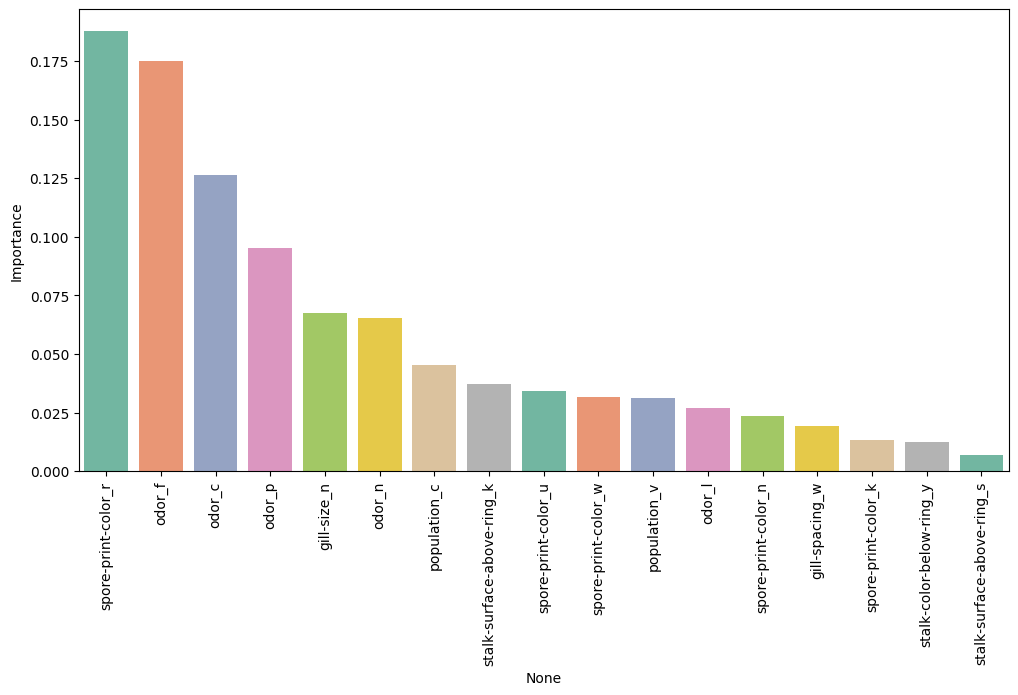

In [76]:
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(data=importances, x=importances.index, y='Importance', palette='Set2')
plt.xticks(rotation=90)